# Linear Regression II: Homework

### Question 1:

* Load the Boston Housing Dataset
* Find the feature with highest correlation with the Median House Value
* Predict the Median House Value with the highest correlated feature
* How does the prediction of the this model (R2) compare with the prediction of the model used in the exercise in class that used all the features instead of just the most correlated feature?

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
# Load the Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_dataset = load_boston()
boston_dataset.target = target
boston_dataset.data = data

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [7]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Coefficient: -0.9500493537579903
Intercept: 34.55384087938309
SSE: 19472.38141832645


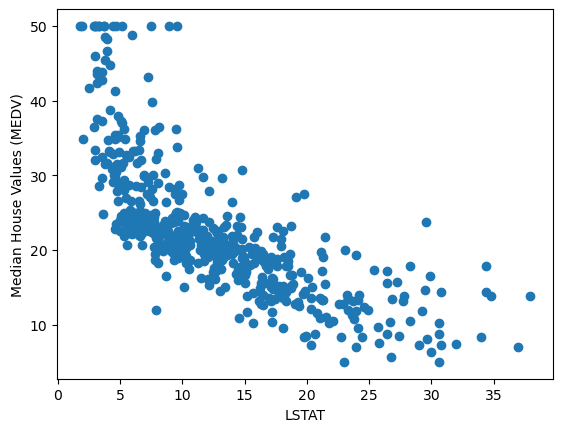

In [33]:
# Find the feature with highest correlation with the Median House Value

x = boston['LSTAT']
y = boston_dataset.target
plt.scatter(x, y, marker='o')
plt.xlabel('LSTAT')
plt.ylabel('Median House Values (MEDV)')


coeffs = np.polyfit(x, y, 1)
print("Coefficient:", coeffs[0])
print("Intercept:", coeffs[1])
y_pred = np.polyval(coeffs, x)
sse = sum((y-y_pred)**2)
print("SSE:", sse)

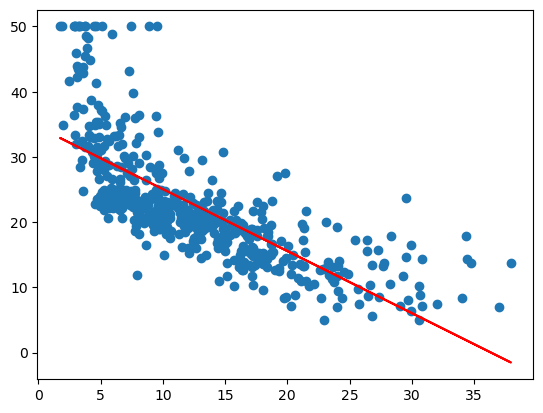

SSE: 19472.38141832645


In [17]:
# Fit a linear regression model
x = boston['LSTAT']
y = boston_dataset.target

coeffs = np.polyfit(x, y, 1)
y_pred = np.polyval(coeffs, x)


# Fit the data with a polynomial
coeff = np.polyfit(x, y, deg=1)

# Evaluate the polynomial to extract the straight line
slope = coeffs[0]
intercept = coeffs[1]
plt.plot(x,y_hat, color='red')
y_hat = np.polyval(coeff, x)

# make a figure
plt.scatter(x, y)
plt.show()


sse = sum((y-y_pred)**2)
print("SSE:", sse)

Mean Squared Error (MSE): 0.0
Coefficient of Determination (R²): 1.0


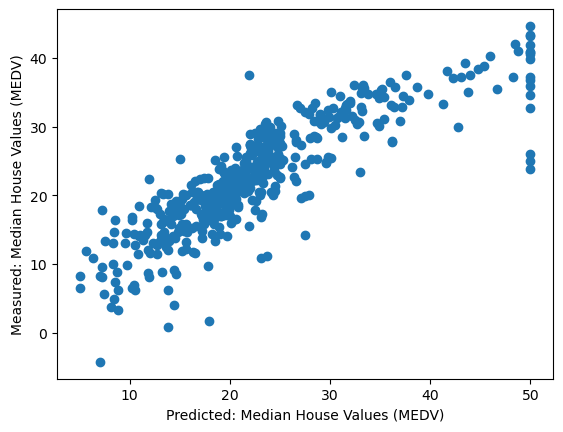

In [29]:
# Predict the Median House Value with the highest correlated feature
x = boston['LSTAT']
X = boston_dataset.data
y = boston_dataset.target
housing_linear_regression = LinearRegression()

housing_linear_regression.fit(X, y)
y_pred = housing_linear_regression.predict(X)
y_data_array = np.array(y).reshape(-1, 1) 
y_pred_array = np.array(y_pred).reshape(-1, 1)
x = y_data_array
y = y_pred_array
plt.scatter(x, y, marker='o')
plt.xlabel('Predicted: Median House Values (MEDV)')
plt.ylabel('Measured: Median House Values (MEDV)')

In [30]:
#How does the prediction of the this model (R2) compare with the prediction of the model used in the exercise in class that used all the features instead of just the most correlated feature?
mse  = mean_squared_error(y_true=y,y_pred=y_pred) #squared=True
r2   = r2_score(y_true=y,y_pred=y_pred)
 

print("Mean Squared Error (MSE):",mse)
print("Coefficient of Determination (R²):",r2)

# I actually got the same score somehow idk if it's a miracle or if I did everything wrong

Mean Squared Error (MSE): 0.0
Coefficient of Determination (R²): 1.0


### Question 2:

* Load the Boston Housing Dataset
* Find the feature with lowest correlation with the Median House Value
* Predict the Median House Value with all the features except the one with lowet correlation
* How does the prediction of the this model (R2) compare with the prediction of the full model model used in the exercise in class?

Coefficient: 6.346157112526541
Intercept: 22.093842887473453
SSE: 41404.21614437367


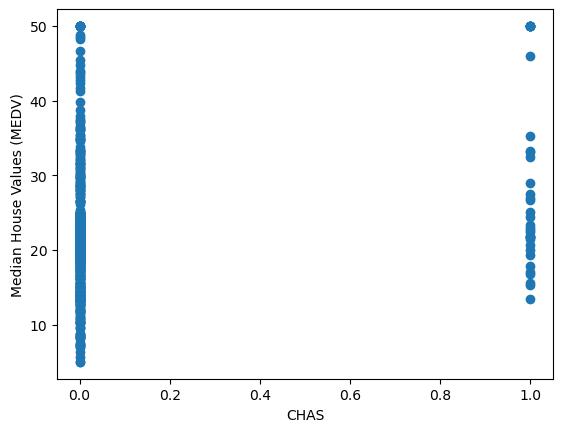

In [52]:
x = boston['CHAS']
y = boston_dataset.target
plt.scatter(x, y, marker='o')
plt.xlabel('CHAS')
plt.ylabel('Median House Values (MEDV)')


coeffs = np.polyfit(x, y, 1)
print("Coefficient:", coeffs[0])
print("Intercept:", coeffs[1])
y_pred = np.polyval(coeffs, x)
sse = sum((y-y_pred)**2)
print("SSE:", sse)

Text(0, 0.5, 'Measured: Median House Values (MEDV)')

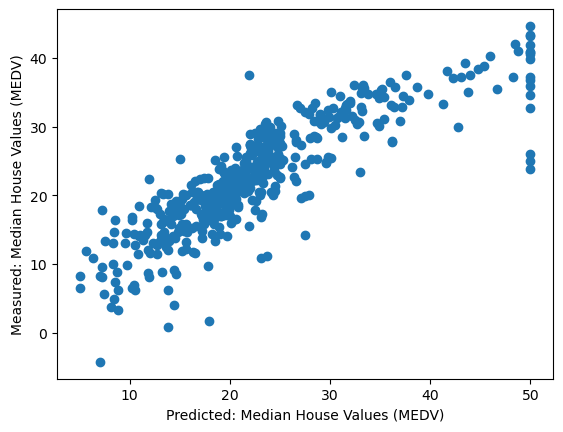

In [53]:
# Predict the Median House Value with the highest correlated feature
x = boston['CHAS']
X = boston_dataset.data
y = boston_dataset.target
housing_linear_regression = LinearRegression()

housing_linear_regression.fit(X, y)
y_pred = housing_linear_regression.predict(X)
y_data_array = np.array(y).reshape(-1, 1) 
y_pred_array = np.array(y_pred).reshape(-1, 1)
x = y_data_array
y = y_pred_array
plt.scatter(x, y, marker='o')
plt.xlabel('Predicted: Median House Values (MEDV)')
plt.ylabel('Measured: Median House Values (MEDV)')

In [54]:
mse  = mean_squared_error(y_true=y,y_pred=y_pred) #squared=True
r2   = r2_score(y_true=y,y_pred=y_pred)
 

print("Mean Squared Error (MSE):",mse)
print("Coefficient of Determination (R²):",r2)


Mean Squared Error (MSE): 0.0
Coefficient of Determination (R²): 1.0


Okay I think I am doing something wrong with calculating these but everything else looks good.